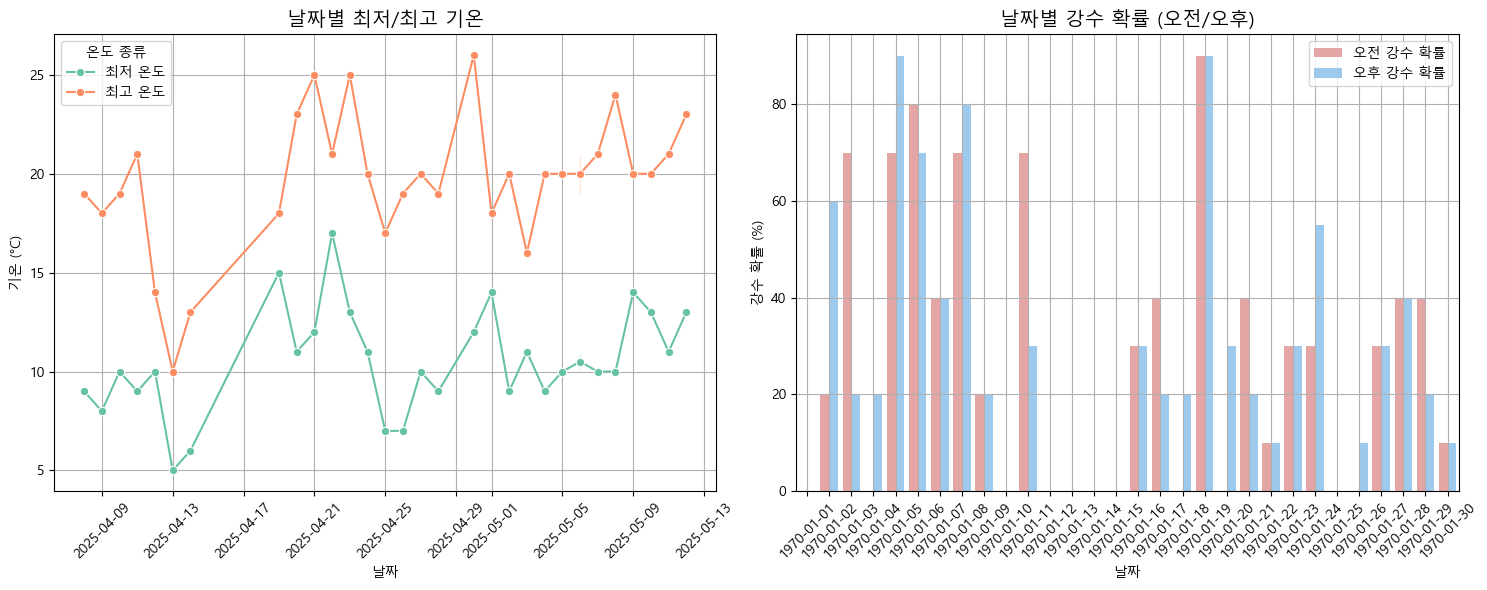

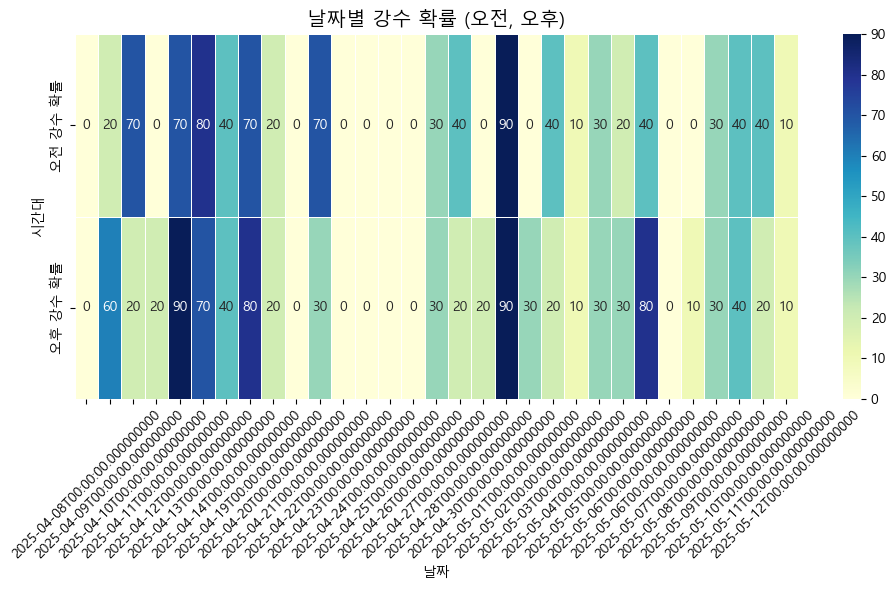

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.dates import DateFormatter
from sqlalchemy import create_engine

# 한글 폰트 설정 (Windows: 맑은 고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# DB 접속 정보
user = 'root'
password = "비밀번호 입력"
host = 'localhost'
port = 3306
db_name = 'de_1_weather'
db_url = f'mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}'
engine = create_engine(db_url)

# 데이터 불러오기
query = "SELECT 날짜, `최저 온도`, `최고 온도`, `오전 강수 확률`, `오후 강수 확률` FROM weather_7 ORDER BY 날짜"
df = pd.read_sql(query, con=engine)

# 날짜 컬럼을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce', format='%Y.%m.%d')

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 최저/최고 기온 시각화
df_temp_melted = pd.melt(df, id_vars=['날짜'], value_vars=['최저 온도', '최고 온도'],
                         var_name='온도 종류', value_name='기온')

sns.lineplot(data=df_temp_melted, x='날짜', y='기온', hue='온도 종류',
             marker='o', palette='Set2', ax=axes[0])
axes[0].set_title('날짜별 최저/최고 기온', fontsize=14)
axes[0].set_xlabel('날짜')
axes[0].set_ylabel('기온 (°C)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 강수 확률 바 그래프
df_rain_melted = pd.melt(df, id_vars='날짜', value_vars=['오전 강수 확률', '오후 강수 확률'],
                         var_name='시간대', value_name='강수 확률')

sns.barplot(data=df_rain_melted, x='날짜', y='강수 확률', hue='시간대',
            palette=['#EF9A9A', '#90CAF9'], errorbar=None, ax=axes[1])

axes[1].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[1].set_title('날짜별 강수 확률 (오전/오후)', fontsize=14)
axes[1].set_xlabel('날짜')
axes[1].set_ylabel('강수 확률 (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# 🔹 히트맵
df_rain = df[['날짜', '오전 강수 확률', '오후 강수 확률']].set_index('날짜')
plt.figure(figsize=(10, 6))
sns.heatmap(df_rain.T, cmap='YlGnBu', annot=True, fmt='d',
            cbar=True, linewidths=0.5)

plt.title('날짜별 강수 확률 (오전, 오후)', fontsize=14)
plt.xlabel('날짜')
plt.ylabel('시간대')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
